In [27]:
%load_ext autoreload
%autoreload 2

In [66]:
from SubjectiveLogic import Hyperopinion, HyperopinionInterface
from SubjectiveLogic.BeliefFusion import cumulative_fusion, averaging_fusion, weighted_fusion
from SubjectiveLogic.Trust import trust_discount_2e
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Callable

# Model

## Tests

In [29]:
AX = Hyperopinion(2, [0.29, 0.71])
BX = Hyperopinion(2, [0.73, 0.27])

In [30]:
cumulative_fusion([AX, BX])

Hyperopinion(2, [0.51 0.49], [0.5 0.5])

In [31]:
averaging_fusion([AX, BX])

Hyperopinion(2, [0.51 0.49], [0.5 0.5])

In [32]:
weighted_fusion([AX, BX])

Hyperopinion(2, [0.51 0.49], [0.5 0.5])

## Definitions

In [42]:
State = List['HyperopinionInterface']
TrustGraph = List[List['HyperopinionInterface']]
TrustArray = List['HyperopinionInterface']

## Initial opinions

### Unifom (as in uniform belief state) with a dogmatic opinion

In [34]:
def uniform_with_a_dogmatic(n: int) -> State:
    ans = []
    for i in range(n):
        ans.append(Hyperopinion(2, [i / (n - 1), 0]))
    return(ans)

In [35]:
uniform_with_a_dogmatic(10)

[Hyperopinion(2, [0. 0.], [0.5 0.5]),
 Hyperopinion(2, [0.11111111 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.22222222 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.33333333 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.44444444 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.55555556 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.66666667 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.77777778 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.88888889 0.        ], [0.5 0.5]),
 Hyperopinion(2, [1. 0.], [0.5 0.5])]

### Uniform (as in uniform belief state) without a dogmatic opinion

In [36]:
def uniform_without_a_dogmatic(n : int) -> State:
    ans = []
    for i in range(n):
        ans.append(Hyperopinion(2, [i / n, 0]))
    return(ans)

In [37]:
uniform_without_a_dogmatic(10)

[Hyperopinion(2, [0. 0.], [0.5 0.5]),
 Hyperopinion(2, [0.1 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.2 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.3 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.4 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.5 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.6 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.7 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.8 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.9 0. ], [0.5 0.5])]

### Uniform (as in uniform belief state) only with dogmatic opinions

In [38]:
def uniform_dogmatic(n: int) -> State:
    ans = []
    for i in range(n):
        ans.append(Hyperopinion(2, [i / (n - 1), 1 - i / (n - 1)]))
    return(ans)

In [39]:
uniform_dogmatic(10)

[Hyperopinion(2, [0. 1.], [0.5 0.5]),
 Hyperopinion(2, [0.11111111 0.88888889], [0.5 0.5]),
 Hyperopinion(2, [0.22222222 0.77777778], [0.5 0.5]),
 Hyperopinion(2, [0.33333333 0.66666667], [0.5 0.5]),
 Hyperopinion(2, [0.44444444 0.55555556], [0.5 0.5]),
 Hyperopinion(2, [0.55555556 0.44444444], [0.5 0.5]),
 Hyperopinion(2, [0.66666667 0.33333333], [0.5 0.5]),
 Hyperopinion(2, [0.77777778 0.22222222], [0.5 0.5]),
 Hyperopinion(2, [0.88888889 0.11111111], [0.5 0.5]),
 Hyperopinion(2, [1. 0.], [0.5 0.5])]

## Trust graph

All trust opinions are dogmatic. (Explain)

### Clique

In [40]:
def clique(n: int) -> TrustGraph:
    trust_graph = []
    for i in range(n):
        trust_graph.append([Hyperopinion(2, [0.5, 0.5]) if i != j else None for j in range(n)])
    return trust_graph

In [41]:
trust_graph = clique(3)
{i : trust_graph[i] for i in range(len(trust_graph))}

{0: [None,
  Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
  Hyperopinion(2, [0.5 0.5], [0.5 0.5])],
 1: [Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
  None,
  Hyperopinion(2, [0.5 0.5], [0.5 0.5])],
 2: [Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
  Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
  None]}

## Update function

In [59]:
def update(
        fusion_operator: Callable[[int], State],
        truster_index: int,
        trust_array: TrustArray,
        state: State) -> HyperopinionInterface:
    truster_opinion = state[truster_index]
    discount_array = [trust_discount_2e(trust_array[trustee_index], state[trustee_index])
        for trustee_index in range(len(state)) if truster_index != trustee_index]
#     print("discount_array =", discount_array)
    new_opinion = fusion_operator([truster_opinion] + discount_array)
    return new_opinion

In [46]:
state = uniform_dogmatic(3)
state

[Hyperopinion(2, [0. 1.], [0.5 0.5]),
 Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
 Hyperopinion(2, [1. 0.], [0.5 0.5])]

In [47]:
trust_graph = clique(3)
trust_graph[0]

[None,
 Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
 Hyperopinion(2, [0.5 0.5], [0.5 0.5])]

In [48]:
update_function(averaging_fusion, 0, trust_graph[0], state)

discount_array = [Hyperopinion(2, [0.25 0.25], [0.5 0.5]), Hyperopinion(2, [0.5 0. ], [0.5 0.5])]


Hyperopinion(2, [0. 1.], [0.5 0.5])

### Overall update function

In [51]:
def overall_update(
        fusion_operator: Callable[[int], State],
        trust_graph: TrustGraph,
        state: State) -> HyperopinionInterface:
    new_state = []
    N = len(state)
    for i in range(N):
        new_state.append(update(averaging_fusion, i, trust_graph[i], state))
    return new_state

## Simulations

### Clique and unifom with only dogmatic opinions and averaging fusion

In [77]:
N = 3
INTERACTIONS = 10
state = uniform_dogmatic(N)
states = [state]
trust_graph = clique(N)

for i in range(INTERACTIONS):
    states.append(overall_update(averaging_fusion, trust_graph, state))

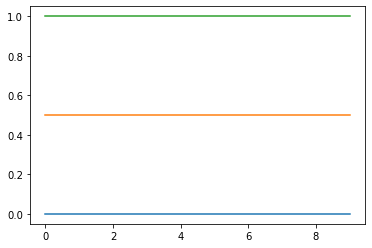

In [81]:
for i in range(N):
    plt.plot(list(range(10)), [states[j][i].b[0] for j in range(INTERACTIONS)])